# Problem 1
1.a) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.



1.b) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

In [1]:
import pandas as pd

# Replace with your actual file path
file_path = "Housing.csv"

# Read the CSV
df = pd.read_csv(file_path)

# Print first 5 rows
print(df.head())

# Optional: Print some info about dataset
print(df.info())
print(df.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

train loss: [np.float64(12617396203243.807), np.float64(2.7205569908951057e+25), np.float64(6.711477370374328e+37), np.float64(1.6556877376139397e+50), np.float64(4.0844984393239066e+62), np.float64(1.0076252376478905e+75), np.float64(2.4857608213776865e+87), np.float64(6.132247020251282e+99), np.float64(1.5127945212580485e+112), np.float64(3.731988055912649e+124), np.float64(9.206626976605043e+136), np.float64(2.271228605677392e+149), np.float64(5.603006825795683e+161), np.float64(1.38223362507139e+174), np.float64(3.40990088657741e+186), np.float64(8.412054116886973e+198), np.float64(2.0752114744443818e+211), np.float64(5.119442414214189e+223), np.float64(1.262940714968451e+236), np.float64(3.1156112726191304e+248), np.float64(7.686056429271017e+260), np.float64(1.89611149353291e+273), np.float64(4.677611762276114e+285), np.float64(1.1539433136295205e+298), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float6

/tmp/ipython-input-4024870153.py:33: RuntimeWarning: overflow encountered in square
  val_loss.append(np.mean((X_val_b @ theta - y_val) ** 2) / 2)
/tmp/ipython-input-4024870153.py:32: RuntimeWarning: overflow encountered in square
  train_loss.append(np.mean(error ** 2) / 2)
/tmp/ipython-input-4024870153.py:30: RuntimeWarning: overflow encountered in matmul
  grad = (X_b.T @ error) / m
/tmp/ipython-input-4024870153.py:30: RuntimeWarning: invalid value encountered in matmul
  grad = (X_b.T @ error) / m
/tmp/ipython-input-4024870153.py:31: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad


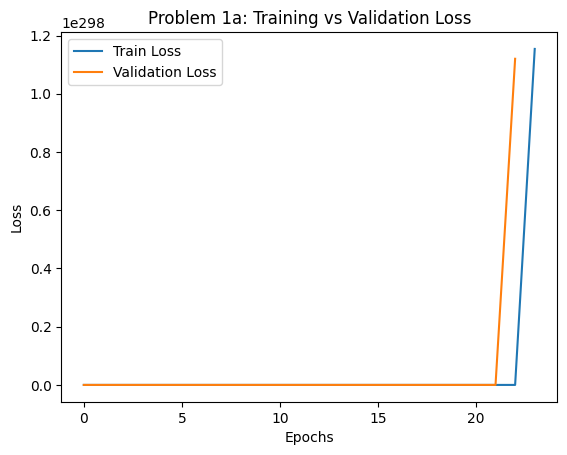

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---- Load dataset ----
df = pd.read_csv(file_path)

# Select required columns
features_1a = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = df[features_1a].values
y = df[target].values

# ---- Train/test split (80/20) ----
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Gradient Descent ----
def gradient_descent(X, y, X_val, y_val, lr=0.05, epochs=60):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]
    theta = np.zeros(n + 1)
    train_loss, val_loss = [], []

    for _ in range(epochs):
        preds = X_b @ theta
        error = preds - y
        grad = (X_b.T @ error) / m
        theta -= lr * grad
        train_loss.append(np.mean(error ** 2) / 2)
        val_loss.append(np.mean((X_val_b @ theta - y_val) ** 2) / 2)
    print(f"train loss: {train_loss}")
    print(f"val loss: {val_loss}")
    return theta, train_loss, val_loss

theta, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val)

print("Best parameters (theta):", theta)

# ---- Plot ----
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 1a: Training vs Validation Loss")
plt.show()


train loss: [np.float64(12617396203243.807), np.float64(2.720557184576702e+25), np.float64(6.7114782774477385e+37), np.float64(1.6556880672833067e+50), np.float64(4.0844995138489897e+62), np.float64(1.0076255671762334e+75), np.float64(2.485761793298533e+87), np.float64(6.132249810153958e+99), np.float64(1.5127953062724174e+112), np.float64(3.7319902312042336e+124), np.float64(9.20663293180246e+136), np.float64(2.271230220064074e+149), np.float64(5.603011166778833e+161), np.float64(1.382234784378779e+174), np.float64(3.4099039646302133e+186), np.float64(8.41206224832968e+198), np.float64(2.0752136131624856e+211), np.float64(5.119448017767578e+223), np.float64(1.2629421781155375e+236), np.float64(3.1156150814062865e+248), np.float64(7.686066316963451e+260), np.float64(1.8961140540536652e+273), np.float64(4.6776183781357303e+285), np.float64(1.1539450195359327e+298), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.float64(inf), np.f

/tmp/ipython-input-4024870153.py:33: RuntimeWarning: overflow encountered in square
  val_loss.append(np.mean((X_val_b @ theta - y_val) ** 2) / 2)
/tmp/ipython-input-4024870153.py:32: RuntimeWarning: overflow encountered in square
  train_loss.append(np.mean(error ** 2) / 2)
/tmp/ipython-input-4024870153.py:30: RuntimeWarning: overflow encountered in matmul
  grad = (X_b.T @ error) / m
/tmp/ipython-input-4024870153.py:30: RuntimeWarning: invalid value encountered in matmul
  grad = (X_b.T @ error) / m
/tmp/ipython-input-4024870153.py:31: RuntimeWarning: invalid value encountered in subtract
  theta -= lr * grad


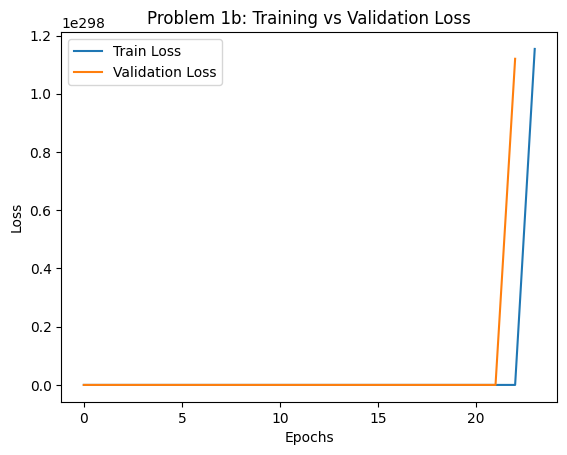

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ---- Load dataset ----
df = pd.read_csv(file_path)

# Convert yes/no categorical to binary (0/1)
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in categorical_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})

# Select features + target
features_1b = [
    "area", "bedrooms", "bathrooms", "stories",
    "mainroad", "guestroom", "basement", "hotwaterheating",
    "airconditioning", "parking", "prefarea"
]
target = "price"

X = df[features_1b].values.astype(float)  # ensure all numeric
y = df[target].values.astype(float)

# ---- Train/test split ----
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Run training ----
theta, train_loss, val_loss = gradient_descent(X_train, y_train, X_val, y_val)

print("Best parameters (theta):", theta)

# ---- Plot ----
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 1b: Training vs Validation Loss")
plt.show()


# Problem 2
2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.



2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

train loss: [np.float64(12617396203243.807), np.float64(11095239873668.7), np.float64(9772690518117.947), np.float64(8623548903860.034), np.float64(7625054698994.252), np.float64(6757435082653.36), np.float64(6003512604596.403), np.float64(5348364517121.198), np.float64(4779026823043.699), np.float64(4284237170316.713), np.float64(3854211494281.0127), np.float64(3480449977837.1733), np.float64(3155568481270.0864), np.float64(2873152098581.467), np.float64(2627627936006.596), np.float64(2414154589612.846), np.float64(2228526130059.797), np.float64(2067088690311.9907), np.float64(1926668002041.738), np.float64(1804506443597.7449), np.float64(1698208351052.1497), np.float64(1605692507714.9329), np.float64(1525150869870.6184), np.float64(1455012710171.1973), np.float64(1393913467564.1377), np.float64(1340667685976.0474), np.float64(1294245505062.2249), np.float64(1253752236778.2124), np.float64(1218410622728.5876), np.float64(1187545420414.379), np.float64(1160570012688.053), np.float64(11

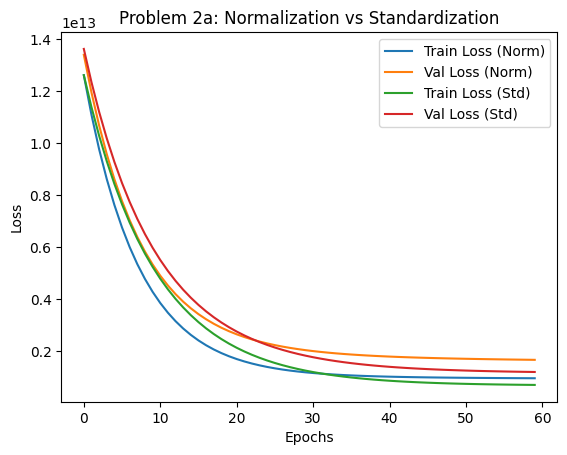

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_2a = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = df[features_2a].values
y = df[target].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Normalization ----
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
theta_norm, loss_train_norm, loss_val_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val)

# ---- Standardization ----
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)
theta_std, loss_train_std, loss_val_std = gradient_descent(X_train_std, y_train, X_val_std, y_val)

# ---- Plot ----
plt.plot(loss_train_norm, label="Train Loss (Norm)")
plt.plot(loss_val_norm, label="Val Loss (Norm)")
plt.plot(loss_train_std, label="Train Loss (Std)")
plt.plot(loss_val_std, label="Val Loss (Std)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 2a: Normalization vs Standardization")
plt.show()


train loss: [np.float64(12617396203243.807), np.float64(9852206948451.078), np.float64(7737649734283.81), np.float64(6120481566514.612), np.float64(4883554803576.516), np.float64(3937315100590.899), np.float64(3213301965374.8), np.float64(2659180222299.8774), np.float64(2234941787162.794), np.float64(1910002092809.8171), np.float64(1660980435500.9863), np.float64(1470003148283.7869), np.float64(1323406452379.6602), np.float64(1210744844648.8481), np.float64(1124033053808.8809), np.float64(1057166549585.6112), np.float64(1005478547646.7665), np.float64(965401359496.0815), np.float64(934207509453.5748), np.float64(909811830029.3274), np.float64(890620172570.289), np.float64(875413753212.8627), np.float64(863260740444.2872), np.float64(853448667664.5223), np.float64(845432765536.7411), np.float64(838796464309.9397), np.float64(833221199545.5823), np.float64(828463329884.3658), np.float64(824336491652.7604), np.float64(820698109693.0863), np.float64(817439085442.914), np.float64(8144759138

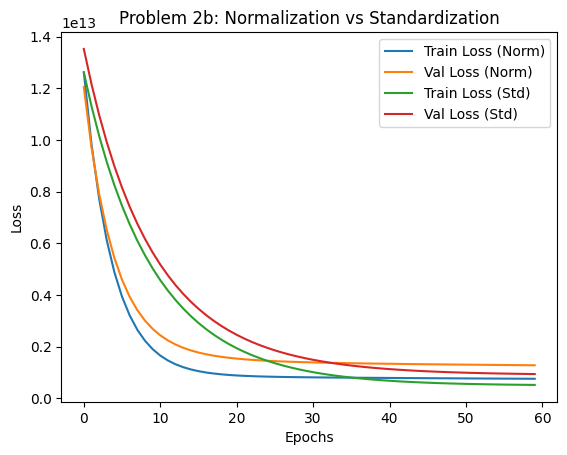

In [38]:
features_2b = [
    "area", "bedrooms", "bathrooms", "stories",
    "mainroad", "guestroom", "basement", "hotwaterheating",
    "airconditioning", "parking", "prefarea"
]
target = "price"

X = df[features_2b].values
y = df[target].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Normalization ----
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
theta_norm, loss_train_norm, loss_val_norm = gradient_descent(X_train_norm, y_train, X_val_norm, y_val)

# ---- Standardization ----
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)
theta_std, loss_train_std, loss_val_std = gradient_descent(X_train_std, y_train, X_val_std, y_val)

# ---- Plot ----
plt.plot(loss_train_norm, label="Train Loss (Norm)")
plt.plot(loss_val_norm, label="Val Loss (Norm)")
plt.plot(loss_train_std, label="Train Loss (Std)")
plt.plot(loss_val_std, label="Val Loss (Std)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 2b: Normalization vs Standardization")
plt.show()


# problem 3
3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

3. b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

train loss: [np.float64(12617397099560.963), np.float64(11388531547368.598), np.float64(10291552278990.445), np.float64(9311370982809.57), np.float64(8434780627400.043), np.float64(7650196640678.195), np.float64(6947437181798.687), np.float64(6317536146987.62), np.float64(5752583638765.774), np.float64(5245589524077.381), np.float64(4790366445272.571), np.float64(4381429256981.805), np.float64(4013908364822.768), np.float64(3683474857552.426), np.float64(3386275668246.662), np.float64(3118877285079.807), np.float64(2878216768714.43), np.float64(2661559029749.5527), np.float64(2466459483128.6543), np.float64(2290731332636.358), np.float64(2132416852344.3406), np.float64(1989762126990.0032), np.float64(1861194792982.4526), np.float64(1745304388660.2734), np.float64(1640824978741.4712), np.float64(1546619765394.0986), np.float64(1461667438490.6604), np.float64(1385050051607.911), np.float64(1315942239202.9736), np.float64(1253601614970.4407), np.float64(1197360212354.1643), np.float64(114

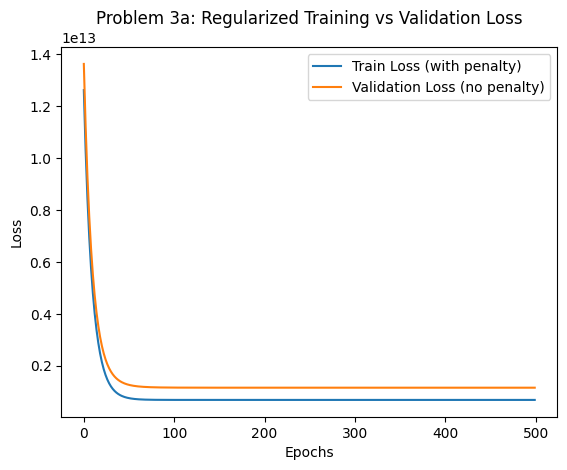

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv(file_path)

features_3a = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = df[features_3a].values
y = df[target].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def gradient_descent_reg(X, y, X_val, y_val, lr=0.05, epochs=500, lam=0.1):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    X_val_b = np.c_[np.ones((X_val.shape[0], 1)), X_val]
    theta = np.zeros(n + 1)
    train_loss, val_loss = [], []

    for _ in range(epochs):
        preds = X_b @ theta
        error = preds - y

        # Gradient with L2 penalty (exclude bias term)
        grad = (X_b.T @ error) / m
        grad[1:] += lam * theta[1:] / m

        theta -= lr * grad

        # Training loss includes penalty
        loss_train = np.mean(error ** 2) / 2 + lam * np.sum(theta[1:] ** 2) / (2*m)
        # Validation loss excludes penalty
        loss_val = np.mean((X_val_b @ theta - y_val) ** 2) / 2

        train_loss.append(loss_train)
        val_loss.append(loss_val)
    print(f"train loss: {train_loss}")
    print(f"val loss: {val_loss}")
    return theta, train_loss, val_loss

# ---- Choose best scaling (from Problem 2a results). Suppose Standardization worked best ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

theta, train_loss, val_loss = gradient_descent_reg(X_train_scaled, y_train, X_val_scaled, y_val, lr=0.05, lam=0.1)

print("Best parameters (theta):", theta)

plt.plot(train_loss, label="Train Loss (with penalty)")
plt.plot(val_loss, label="Validation Loss (no penalty)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 3a: Regularized Training vs Validation Loss")
plt.show()


train loss: [np.float64(12617398887068.555), np.float64(11095249917953.432), np.float64(9772716370650.549), np.float64(8623596748001.29), np.float64(7625128903674.199), np.float64(6757538573161.865), np.float64(6003647167213.701), np.float64(5348531048573.679), np.float64(4779225534025.873), np.float64(4284467750844.644), np.float64(3854473247395.065), np.float64(3480741927118.183), np.float64(3155889456743.676), np.float64(2873500804835.184), np.float64(2628003005712.6313), np.float64(2414554625117.163), np.float64(2228949735251.219), np.float64(2067534494609.132), np.float64(1927134678020.4502), np.float64(1804992719517.663), np.float64(1698713019319.9453), np.float64(1606214430137.2097), np.float64(1525688980395.3547), np.float64(1455566015688.3513), np.float64(1394481047229.3845), np.float64(1341248689433.1333), np.float64(1294839149866.214), np.float64(1254357805261.412), np.float64(1219027458501.1445), np.float64(1188172924650.666), np.float64(1161207640316.4934), np.float64(1137

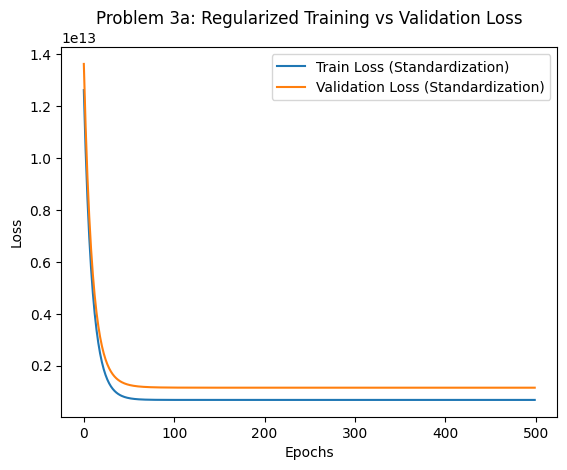

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv(file_path)

features_3a = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

X = df[features_3a].values
y = df[target].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Try Normalization ----
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
theta_norm, loss_train_norm, loss_val_norm = gradient_descent_reg(X_train_norm, y_train, X_val_norm, y_val)

# ---- Try Standardization ----
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)
theta_std, loss_train_std, loss_val_std = gradient_descent_reg(X_train_std, y_train, X_val_std, y_val)

# ---- Pick best scaling based on final validation loss ----
if loss_val_norm[-1] < loss_val_std[-1]:
    best = "Normalization"
    train_loss, val_loss = loss_train_norm, loss_val_norm
else:
    best = "Standardization"
    train_loss, val_loss = loss_train_std, loss_val_std

print(f"Best scaling approach: {best}")

# ---- Plot ONLY the best scaling results ----
plt.plot(train_loss, label=f"Train Loss ({best})")
plt.plot(val_loss, label=f"Validation Loss ({best})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 3a: Regularized Training vs Validation Loss")
plt.show()


train loss: [np.float64(12617406769863.688), np.float64(9852244081140.145), np.float64(7737739523300.985), np.float64(6120636127564.164), np.float64(4883777448293.478), np.float64(3937603842473.504), np.float64(3213651858963.8794), np.float64(2659584891183.822), np.float64(2235394393553.9424), np.float64(1910495927328.042), np.float64(1661509252586.2158), np.float64(1470561334608.2415), np.float64(1323989088551.2046), np.float64(1211347701331.0159), np.float64(1124652549904.654), np.float64(1057799690724.5947), np.float64(1006122856708.5658), np.float64(966054806451.5898), np.float64(934868444802.8071), np.float64(910478924123.8986), np.float64(891292361820.0562), np.float64(876090193369.1388), np.float64(863940766670.9352), np.float64(854131760844.149), np.float64(846118524136.5074), np.float64(839484581098.0704), np.float64(833911442470.1749), np.float64(829155526476.9039), np.float64(825030516384.3466), np.float64(821393873781.9646), np.float64(818136528681.3163), np.float64(8151749

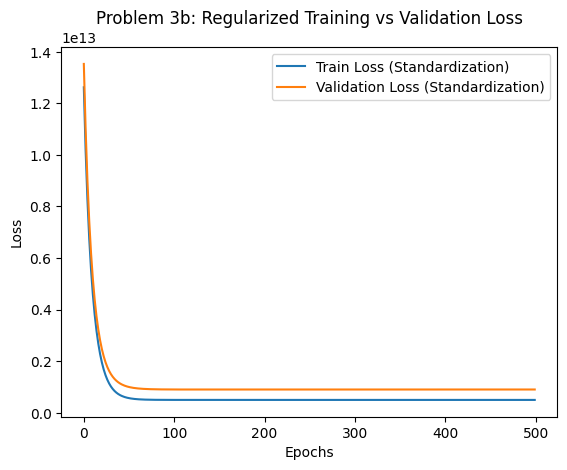

In [44]:
# ---- Convert categoricals ----
categorical_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in categorical_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})

features_3b = [
    "area", "bedrooms", "bathrooms", "stories",
    "mainroad", "guestroom", "basement", "hotwaterheating",
    "airconditioning", "parking", "prefarea"
]
target = "price"

X = df[features_3b].values.astype(float)
y = df[target].values.astype(float)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Try Normalization ----
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)
theta_norm, loss_train_norm, loss_val_norm = gradient_descent_reg(X_train_norm, y_train, X_val_norm, y_val)

# ---- Try Standardization ----
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)
theta_std, loss_train_std, loss_val_std = gradient_descent_reg(X_train_std, y_train, X_val_std, y_val)

# ---- Pick best scaling based on validation loss ----
if loss_val_norm[-1] < loss_val_std[-1]:
    best = "Normalization"
    train_loss, val_loss = loss_train_norm, loss_val_norm
else:
    best = "Standardization"
    train_loss, val_loss = loss_train_std, loss_val_std

print(f"Best scaling approach: {best}")

# ---- Plot ONLY best scaling results ----
plt.plot(train_loss, label=f"Train Loss ({best})")
plt.plot(val_loss, label=f"Validation Loss ({best})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Problem 3b: Regularized Training vs Validation Loss")
plt.show()
